## The time() function returns the number of seconds passed since epoch

In [0]:
import time
start = time.time()

## Changing TensorFlow version from 2.2.0 to 1.14.0 

There's nothing wrong with tensorflow, but rather with Colab's <b>  _TensorflowImportHook </b>  missing <b> find_spec </b> impl so it will raise if tensorflow is installed as egg dir. Since the hook doesn't do anything useful besides issuing a notification to update tensorflow to 2.0 and is scheduled for removal anyway, an easy fix would be purging it from <b> sys.meta_path </b>  somewhere at the start of the notebook:

In [0]:
!pip install tensorflow==1.14.0

     |████████████████████████████████| 109.2MB 97kB/s 
     |████████████████████████████████| 491kB 50.4MB/s 
     |████████████████████████████████| 3.2MB 49.9MB/s 
  Found existing installation: tensorflow-estimator 2.2.0
    Uninstalling tensorflow-estimator-2.2.0:
      Successfully uninstalled tensorflow-estimator-2.2.0
  Found existing installation: tensorboard 2.2.1
    Uninstalling tensorboard-2.2.1:
      Successfully uninstalled tensorboard-2.2.1
  Found existing installation: tensorflow 2.2.0
    Uninstalling tensorflow-2.2.0:
      Successfully uninstalled tensorflow-2.2.0


## Installing necessary libraries

1.  <b> Pandas </b>: Pandas is the most and favourite data science liabrary writtem for the python programming lanaguage for data manimulation and analysis also provides high_performance, easy to use strcutures and data analysis tools.


2. <b> NumPy </b> :  Numpy is a package in python used for scientific calculating and perform various operations. Numpy Array is a multidimensional array whose indexed is similar to Sequences which is start with Zero that is used to store values of      same datatype Numpy in python uses less memory to store data as compared with python list. Numpy provides multiple           functions they are where, nonzero and count_nonzero for finding the element.


3. <b> os </b> : The OS module also known as Python's standard utility modules which provides functions for interacting with the operating system. This module is implemented by calling the standard C function system() method and has the same limitations.


4. <b> sys </b> : The python sys module provides functions and variables which are used to manipulate different parts of the Python Runtime Environment. It lets us access system-specific parameters and functions. 


5. <b> shuffle </b> : The shuffle() method takes a sequence (list, string, or tuple) and reorganize the order of the items. 


6. <b> tqdm </b>: tqdm (or python -m tqdm) between pipes will pass through all stdin to stdout while printing progress to stderr. 


7. <b> SciPy </b> : SciPy is a library that uses NumPy for more mathematical functions. SciPy uses NumPy arrays as the basic data structure, and comes with modules for various commonly used tasks in scientific programming, including linear algebra, integration (calculus), ordinary differential equation solving, and signal processing.


8. <b> skimage </b> : Scikit-image, or skimage, is an open source Python package designed for image preprocessing.


9. <b> resize </b> : To resize an image, you call the resize() method on it, passing in a two-integer tuple argument representing the width and height of the resized image.


10. <b> Sklearn </b> provides best function for partitioning data into training set and testing set. We provide certain proportion of data to use as a test set and we can provide the parameter random_state to ensure repeatable results. test_size parameter decides the size of the data that has to be split as the the test dataset. 

In [0]:
import pandas as pd 
import cv2                 
import numpy as np         
import os,sys                  
from random import shuffle
from tqdm import tqdm  
import scipy
import skimage
from skimage.transform import resize
from sklearn.model_selection import train_test_split

LABELS = ["Normal", "Cancer"]

## Access any file from colab which gives write as well as read permission

In [0]:
from google.colab import drive
drive.mount('/content/drive') 

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Get list of all files and directories in the val directory

In [0]:
path="/content/drive/My Drive/cancer_detection/dataset/val"
print(os.listdir(path))


['Normal', 'Cancer']


## Get list of all files and directories in the train directory

In [0]:
print(os.listdir("/content/drive/My Drive/cancer_detection/dataset/train"))

['Cancer', 'Normal']


## Get list of all files and directories in the test directory

In [0]:
print(os.listdir("/content/drive/My Drive/cancer_detection/dataset/test"))

['Cancer', 'Normal']


In [0]:
TRAIN_DIR = "/content/drive/My Drive/cancer_detection/dataset/train/"
TEST_DIR =  "/content/drive/My Drive/cancer_detection/dataset/test/"

## Preprocessing 

In [0]:
def get_label(Dir):
    for nextdir in os.listdir(Dir):
        if not nextdir.startswith('.'):
            if nextdir in ['Cancer']:
                label = 0
            elif nextdir in ['Normal']:
                label = 1
            else:
                label = 2
    return nextdir, label

In [0]:
def preprocessing_data(Dir):
    X = []
    y = []
    
    for nextdir in os.listdir(Dir):
        nextdir, label = get_label(Dir)
        temp = Dir + nextdir
        
        for image_filename in tqdm(os.listdir(temp)):
            path = os.path.join(temp + '/' , image_filename)
            img = cv2.imread(path,cv2.IMREAD_GRAYSCALE)
            if img is not None:
                img = skimage.transform.resize(img, (150, 150, 3))
                img = np.asarray(img)
                X.append(img)
                y.append(label)
            
    X = np.asarray(X)
    y = np.asarray(y)
    
    return X,y

## Reading data into memory along with the labels.

In [0]:
def get_data(Dir):
    X = []
    y = []
    for nextDir in os.listdir(Dir):
        if not nextDir.startswith('.'):
            if nextDir in ['Cancer']:
                label = 0
            elif nextDir in ['Normal']:
                label = 1
            else:
                label = 2
                
            temp = Dir + nextDir
                
            for file in tqdm(os.listdir(temp)):
                img = cv2.imread(temp + '/' + file)
                if img is not None:
                    img = skimage.transform.resize(img, (150, 150, 3))
                    #img_file = scipy.misc.imresize(arr=img_file, size=(150, 150, 3))
                    img = np.asarray(img)
                    X.append(img)
                    y.append(label)
                    
    X = np.asarray(X)
    y = np.asarray(y)
    return X,y

### splitting training data

The training set is a subset of the data set used to train a model. x_train is the training data set. y_train is the set of labels to all the data in x_train

In [12]:
X_train, y_train = get_data(TRAIN_DIR)

100%|██████████| 2493/2493 [25:30<00:00,  1.63it/s]


### splitting testing data

The test set is a subset of the data set that you use to test your model after the model has gone through initial vetting by the validation set. x_test is the test data set. y_test is the set of labels to all the data in x_test 

In [13]:
X_test , y_test = get_data(TEST_DIR)

100%|██████████| 620/620 [07:06<00:00,  1.45it/s]



### Returns tuple of shape (Rows, columns) of dataframe/series

In [14]:
print(X_train.shape,'\n',X_test.shape)

(4971, 150, 150, 3) 
 (1249, 150, 150, 3)
(4971, 150, 150, 3) 
 (1249, 150, 150, 3)


In [15]:
print(y_train.shape,'\n',y_test.shape)

(4971,) 
 (1249,)
(4971,) 
 (1249,)


#### np.utils.to_categorical is used to convert array of labeled data(from 0 to nb_classes-1) to one-hot vector.

In [16]:
from keras.utils.np_utils import to_categorical

y_train = to_categorical(y_train, 2)
y_test = to_categorical(y_test, 2)

Using TensorFlow backend.
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:519: FutureWarn

In [17]:
print(y_train.shape,'\n',y_test.shape)

(4971, 2) 
 (1249, 2)
(4971, 2) 
 (1249, 2)


In [0]:
Pimages = os.listdir(TRAIN_DIR + "Cancer")
Nimages = os.listdir(TRAIN_DIR + "Normal")

### blood cells with cancer and without cancer

(Left) - No CANCER Vs (Right) - CANCER
-----------------------------------------------------------------------------------------------------------------------------------


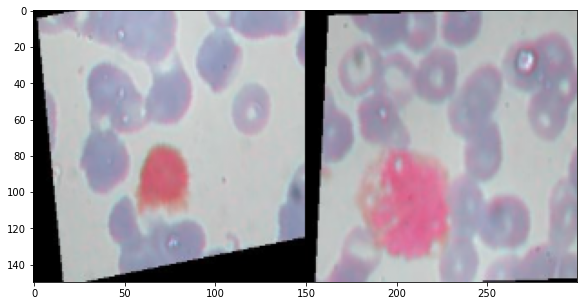

(Left) - No CANCER Vs (Right) - CANCER
-----------------------------------------------------------------------------------------------------------------------------------


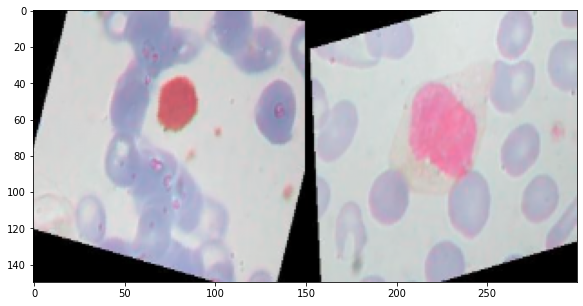

(Left) - No CANCER Vs (Right) - CANCER
-----------------------------------------------------------------------------------------------------------------------------------


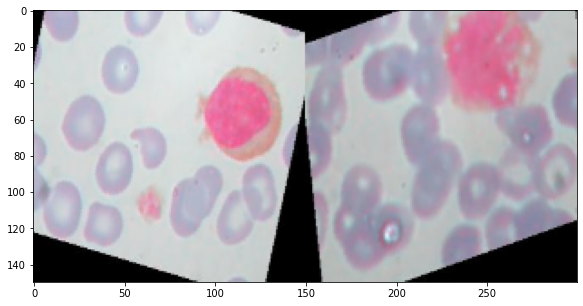

(Left) - No CANCER Vs (Right) - CANCER
-----------------------------------------------------------------------------------------------------------------------------------


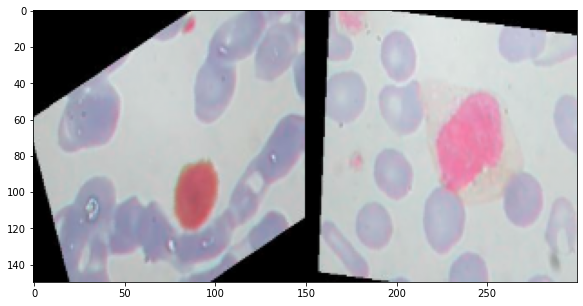

(Left) - No CANCER Vs (Right) - CANCER
-----------------------------------------------------------------------------------------------------------------------------------


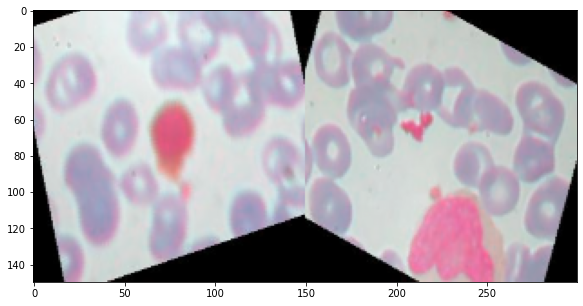

(Left) - No CANCER Vs (Right) - CANCER
-----------------------------------------------------------------------------------------------------------------------------------


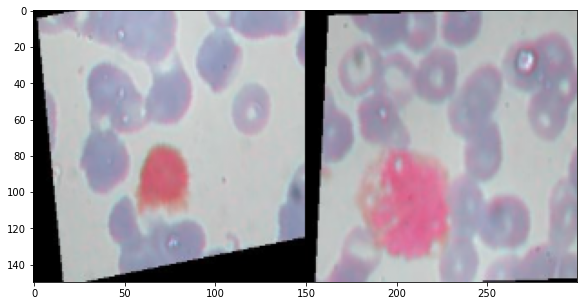

(Left) - No CANCER Vs (Right) - CANCER
-----------------------------------------------------------------------------------------------------------------------------------


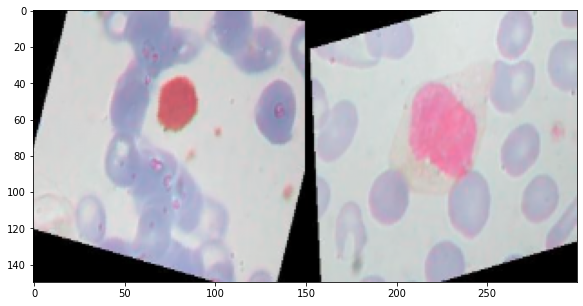

(Left) - No CANCER Vs (Right) - CANCER
-----------------------------------------------------------------------------------------------------------------------------------


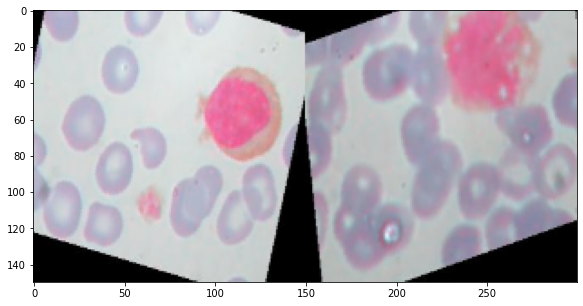

(Left) - No CANCER Vs (Right) - CANCER
-----------------------------------------------------------------------------------------------------------------------------------


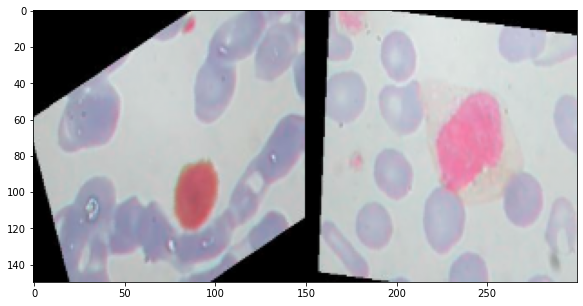

(Left) - No CANCER Vs (Right) - CANCER
-----------------------------------------------------------------------------------------------------------------------------------


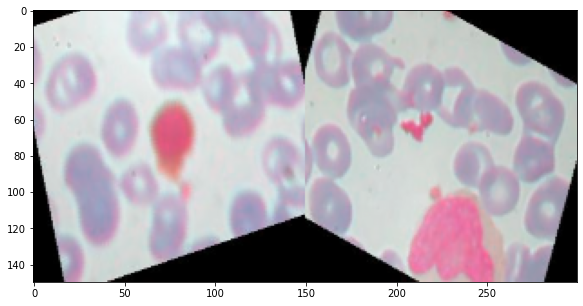

In [19]:
import matplotlib.pyplot as plt
def plotter(i):
    imagep1 = cv2.imread(TRAIN_DIR+"Cancer/"+Pimages[i])
    imagep1 = skimage.transform.resize(imagep1, (150, 150, 3) , mode = 'reflect')
    imagen1 = cv2.imread(TRAIN_DIR+"Normal/"+Nimages[i])
    imagen1 = skimage.transform.resize(imagen1, (150, 150, 3))
    pair = np.concatenate((imagen1, imagep1), axis=1)
    print("(Left) - No CANCER Vs (Right) - CANCER")
    print("-----------------------------------------------------------------------------------------------------------------------------------")
    plt.figure(figsize=(10,5))
    plt.imshow(pair)
    plt.show()
for i in range(0,5):
    plotter(i)

In [0]:
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import accuracy_score

#function
def train_test_rmse(x,y):
    x = Iris_data[x]
    y = Iris_data[y]
    X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.2,random_state=123)
    linreg = LinearRegression()
    linreg.fit(X_train, y_train)
    y_pred = linreg.predict(X_test)
    print(accuracy_score(y_test, y_pred))  # or you can save it in variable and return it 
    return np.sqrt(metrics.mean_squared_error(y_test, y_pred))

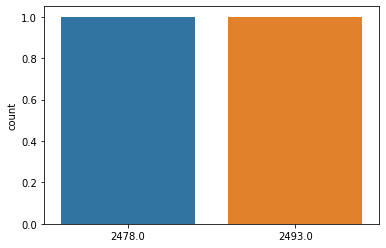

In [71]:
import seaborn as sns
count = y_train.sum(axis = 0)
sns.countplot(x = count)

In [22]:
from keras.callbacks import ReduceLROnPlateau , ModelCheckpoint
lr_reduce = ReduceLROnPlateau(monitor='val_acc', factor=0.1, epsilon=0.0001, patience=1, verbose=1)

/usr/local/lib/python3.6/dist-packages/keras/callbacks/callbacks.py:998: UserWarning: `epsilon` argument is deprecated and will be removed, use `min_delta` instead.
  warnings.warn('`epsilon` argument is deprecated and '
/usr/local/lib/python3.6/dist-packages/keras/callbacks/callbacks.py:998: UserWarning: `epsilon` argument is deprecated and will be removed, use `min_delta` instead.
  warnings.warn('`epsilon` argument is deprecated and '


In [0]:
filepath="weights.hdf5"
checkpoint = ModelCheckpoint(filepath, monitor='val_acc', verbose=1, save_best_only=True, mode='max')

In [0]:
from keras import *
from keras.models import Sequential
from keras.utils import np_utils
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.optimizers import Adam, SGD , RMSprop
from keras.layers.normalization import BatchNormalization
from keras.layers import Conv2D, MaxPooling2D, GlobalAveragePooling2D,BatchNormalization
from keras.preprocessing.image import ImageDataGenerator
from keras.utils import np_utils
from sklearn.model_selection import GridSearchCV
from keras.wrappers.scikit_learn import KerasClassifier

### Working of CNN


I have implemented CNN for the feature extraction and classification of the blood samples.

A CNN is a multilayered neural network with a special architecture to detect complex features in data. CNNs have been used in image recognition, powering vision in robots, text in images and for self-driving vehicles.

The CNN consist layer of neurons and it is optimized for two-dimensional pattern recognition. CNN has three types of layer namely convolutional layer, pooling layer and fully connected layer. My network consists of 11 layers excluding the input layer. The input layer takes in a RGB color image where each color channel is processed separately.

The first 6 layers of convolution network are convolution layer. First 2 convolution layer applies 16 of 3*3 filters to an image in the layer. The other two layer applies 32 of 3*3 filters to an image. And the last 2 layers of convolution applies 64 of 3*3 filters to an image. The nonlinear transformation sublayer employs the ReLU activation function. The max pooling sublayer applies a 2*2 filter to the image which results in reducing the image size to its half. At this point, convolution network extracts 64 features, each represented by a 32*32 array for each color channel.

The eighth layer is the flatten layer. The flatten layer transforms a multidimensional array into one-dimensional array by simply concatenating the entries of the multidimensional array together. The output of this flatten layer is a one-dimensional array of size 4800. The ninth layer is the fully connected ANN with the ReLU activation function that maps 4800 input values to the 64 output values. The tenth layer is the dropout layer. 50% of the input values coming to the layer are dropped to zero to reduce the problem of overfitting. The eleventh and the final layer is a fully connected ANN with the sigmoid activation function that maps 64 input values to 2 class labels.

First, I train convolution network using the data in training set to find appropriated filters’ weights in the three convolutional sublayers and the weights that yield minimum error in the two fully connected layers. Next, I evaluate convolution network using the data in the validation set to obtain validation error and cross-entropy loss. I repeat the training of convolution network in this same procedure until I complete 10 epochs. Last, I evaluate the performance of convolution network using data in the test set

In [25]:
model = Sequential()
model.add(Conv2D(16, (3, 3), activation='relu', padding="same", input_shape=(150,150,3)))
model.add(Conv2D(16, (3, 3), padding="same", activation='relu'))

model.add(Conv2D(32, (3, 3), activation='relu', padding="same"))
model.add(Conv2D(32, (3, 3), padding="same", activation='relu'))

model.add(Conv2D(64, (3, 3), activation='relu', padding="same"))
model.add(Conv2D(64, (3, 3), padding="same", activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))


model.add(Flatten())

model.add(Dense(64, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(2 , activation='sigmoid'))

model.compile(loss='binary_crossentropy',
                  optimizer=RMSprop(lr=0.00005),
                  metrics=['accuracy'])

print(model.summary())



Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 150, 150, 16)      448       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 150, 150, 16)      2320      
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 150, 150, 32)      4640      
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 150, 150, 32)      9248      
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 150, 150, 64)      18496     
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 150, 150, 64)      36928     
_________________________

In [0]:
batch_size = 256
epochs = 10

### Classification 


Neural networks are used in the automatic detection of cancer in blood samples. Neural network is chosen as a classification tool due to its well-known technique as a successful classifier for many real applications. The training and validation processes are among the important steps in developing an accurate process model using CNNs. The dataset for training and validation processes consists of two parts; the training features set which are used to train the CNN model; whilst a testing features sets are used to verify the accuracy of the trained using the feed- forward back propagation network. In the training part, connection weights were always updated until they reached the defined iteration Number or suitable error. Neural networks are used in the automatic detection of cancer in blood samples. Neural network is chosen as a classification tool due to its well-known technique as a successful classifier for many real applications. The training and validation processes are among the important steps in developing an accurate process model using CNNs.

### Result and Analysis


The final output of my project is to detect the cancer accurately with the help of iterations obtained, loss and accuracy graph and the confusion matrix.

I have performed twenty series of iteration from which I can clearly observe that the loss is decreasing with each iteration. Loss is about how much right the model is. So I wanted to minimize the loss function and as a result my model has perfectly declined the loss value straight from starting point and at every iteration I get closer to minimum.


Next I performed loss and accuracy curve for the best result of my model. These learning curves (loss and accuracy curve) shows the performance of my model on training and validation set as a function of number of training iterations.

I have loss curve which is decreasing with each iteration which shows that loss is minimizing giving the best result. On the other hand, I have performed accuracy curve which is increasing with each iteration that means my model is getting better and better at learning.


Next I performed loss and accuracy curve for the best result of my model. These learning curves (loss and accuracy curve) shows the performance of my model on training and validation set as a function of number of training iterations.

I have loss curve which is decreasing with each iteration which shows that loss is minimizing giving the best result. On the other hand, I have performed accuracy curve which is increasing with each iteration that means my model is getting better and better at learning.

In [27]:
history = model.fit(X_train, y_train, validation_data = (X_test , y_test) ,callbacks=[lr_reduce,checkpoint] ,
          epochs=epochs)



Train on 4971 samples, validate on 1249 samples
Epoch 1/10
4971/4971 [==============================] - 1328s 267ms/step - loss: 0.6998 - accuracy: 0.4931 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 2/10


/usr/local/lib/python3.6/dist-packages/keras/callbacks/callbacks.py:1042: RuntimeWarning: Reduce LR on plateau conditioned on metric `val_acc` which is not available. Available metrics are: val_loss,val_accuracy,loss,accuracy,lr
  (self.monitor, ','.join(list(logs.keys()))), RuntimeWarning
/usr/local/lib/python3.6/dist-packages/keras/callbacks/callbacks.py:707: RuntimeWarning: Can save best model only with val_acc available, skipping.
  'skipping.' % (self.monitor), RuntimeWarning)


4971/4971 [==============================] - 1305s 262ms/step - loss: 0.6903 - accuracy: 0.5298 - val_loss: 0.6662 - val_accuracy: 0.8311
Epoch 3/10
4971/4971 [==============================] - 1351s 272ms/step - loss: 0.6491 - accuracy: 0.6473 - val_loss: 0.5910 - val_accuracy: 0.6329
Epoch 4/10
4971/4971 [==============================] - 1375s 277ms/step - loss: 0.5426 - accuracy: 0.7466 - val_loss: 0.4457 - val_accuracy: 0.8002
Epoch 5/10
4971/4971 [==============================] - 1381s 278ms/step - loss: 0.4419 - accuracy: 0.8083 - val_loss: 0.2888 - val_accuracy: 0.8971
Epoch 6/10
4971/4971 [==============================] - 1375s 277ms/step - loss: 0.3789 - accuracy: 0.8410 - val_loss: 0.2680 - val_accuracy: 0.8991
Epoch 7/10
4971/4971 [==============================] - 1372s 276ms/step - loss: 0.3549 - accuracy: 0.8510 - val_loss: 0.2332 - val_accuracy: 0.9035
Epoch 8/10
4971/4971 [==============================] - 1369s 275ms/step - loss: 0.3278 - accuracy: 0.8623 - val_loss

/usr/local/lib/python3.6/dist-packages/keras/callbacks/callbacks.py:1042: RuntimeWarning: Reduce LR on plateau conditioned on metric `val_acc` which is not available. Available metrics are: val_loss,val_accuracy,loss,accuracy,lr
  (self.monitor, ','.join(list(logs.keys()))), RuntimeWarning
/usr/local/lib/python3.6/dist-packages/keras/callbacks/callbacks.py:707: RuntimeWarning: Can save best model only with val_acc available, skipping.
  'skipping.' % (self.monitor), RuntimeWarning)


4971/4971 [==============================] - 1305s 262ms/step - loss: 0.6903 - accuracy: 0.5298 - val_loss: 0.6662 - val_accuracy: 0.8311
Epoch 3/10
4971/4971 [==============================] - 1351s 272ms/step - loss: 0.6491 - accuracy: 0.6473 - val_loss: 0.5910 - val_accuracy: 0.6329
Epoch 4/10
4971/4971 [==============================] - 1375s 277ms/step - loss: 0.5426 - accuracy: 0.7466 - val_loss: 0.4457 - val_accuracy: 0.8002
Epoch 5/10
4971/4971 [==============================] - 1381s 278ms/step - loss: 0.4419 - accuracy: 0.8083 - val_loss: 0.2888 - val_accuracy: 0.8971
Epoch 6/10
4971/4971 [==============================] - 1375s 277ms/step - loss: 0.3789 - accuracy: 0.8410 - val_loss: 0.2680 - val_accuracy: 0.8991
Epoch 7/10
4971/4971 [==============================] - 1372s 276ms/step - loss: 0.3549 - accuracy: 0.8510 - val_loss: 0.2332 - val_accuracy: 0.9035
Epoch 8/10
4971/4971 [==============================] - 1369s 275ms/step - loss: 0.3278 - accuracy: 0.8623 - val_loss

In [0]:
model.save('blood_cancer_detection.h5')

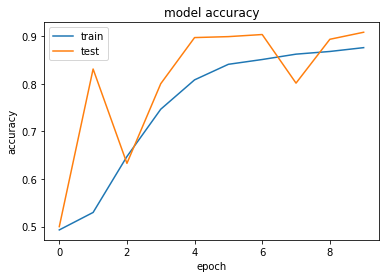

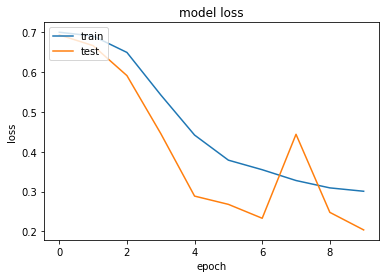

In [41]:
import matplotlib.pyplot as plt
from keras.models import load_model


plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [0]:
from sklearn.metrics import confusion_matrix
pred = model.predict(X_test)
pred = np.argmax(pred,axis = 1) 
y_true = np.argmax(y_test,axis = 1)


In [43]:
cnf = confusion_matrix(y_true, pred )
np.set_printoptions(precision=2)
cnf

array([[565,  64],
       [ 52, 568]])

In [44]:
from sklearn.metrics import accuracy_score
print ('Accuracy Score :',accuracy_score(y_true, pred)) 

Accuracy Score : 0.9071257005604484


### Confusion Matrix

Here the 0 belongs to class of people not having cancer and 1 belongs to class of people having cancer. The confusion matrix consists of True positive, True negative, False positive and False positive values according to which different parameters are calculated which is shown in figure below:

<b> Accuracy </b> is the mostly common used matrix to evaulated the model which is actually not a clear indicator of the performance.

Accuracy = (565 + 568)  / (565 + 64 + 52 + 568) = 0.9071

<b> Precision </b> is the percentage of positive instances out of the total predicted positive instances which means precision or positive predicted value means how much model is right when it says it is right.

Precision of class 0 = 565 / (565 + 52) = 0.9157

Precision of class 1 = 568  / (64 + 568) = 0.8987


<b> Recall </b> is the percentage of positive instances out of the total actual positive instances. Recall shows how much extra right ones, the model missed when os showed the right ones.

Recall of class 0 = 565 / (565 + 64) = 0.8982

Recall of ckass 1 = 568 / (568 + 52) = 0.9161


<b> F1-Score</b>: F1- score is the harmoncic mean of the precision and recall which means higher the value of f1-score better will be the model. due to the product in the numerator if one goes low, the final F1 score goes down significantly. So a model does well in F1 score if the positive predicted are actually positives (precision) and doesn't miss out on positives and predicts them negative (recall).

F1-score of class 0 = 2 * 0.9157 * 0.8982 / (0.9157 + 0.8982) = 0.9068

F1-score of class 1 = 2 * 0.8987 * 0.9161 / (0.8987  + 0.9161) = 0.9073

<b> Support </b> : It is the total number of element in each predicted class. Here, support for class 0 and 1 are 620 and 620 respectively

<b> Macro Average </b> : It is the normal average

Macro Average for Precision: (0.9157 +0.8987) / 2 = 0.9072
Macro Average for Recall : (0.8982 +0.9161) / 2 = 0.90715

<b> Weighted Average </b> = The method of calculating a kind of arithmetic mean of a set of numbers in which some elements of the set have greater (weight) value than others

Weighted Average of Precision = (0.9157 * 617) + (0.8987 * 632) / 1249 = 0.907039

Weighted Average of Recall = (0.8982 * 629) + (0.9161 * 620) / 1249 = 0.907085

<b> Specificity </b> also known as true negative class which is the number of items correctly identified as negative out of the total negatives. Exact oppositive to Recall

Specificity = TN / (TN + FP)


<b> False alarm rate </b>: False alarm rate measure from total instances classified as fraudulent how many were wrongly classified.

False alarm rate = FP/(TN + FP )

<b> Cost </b> : Cost tells the cost of our system being effective.
Cost = 100 * FN + 10 * (FP + TP)


Here, the recall is most significant quantity even more than accuracy and precision. Since I have unequal number of people in both the classes, therefore I can’t take accuracy as an alone metric to calculate model accuracy. Also, I  have to minimize the false negative which is in the denominator of recall increasing the value for recall.

False negative has to be intuitively minimized because falsely diagnosing a patient of Cancer as not having Cancer is much larger deal than falsely diagnosing a healthy person as a Cancer patient which is our major concern. That is why I am making this model to reduce the mistakes done by doctors accidentally.

In [45]:
from sklearn.metrics import classification_report
print(classification_report(y_true, pred))

              precision    recall  f1-score   support

           0       0.92      0.90      0.91       629
           1       0.90      0.92      0.91       620

    accuracy                           0.91      1249
   macro avg       0.91      0.91      0.91      1249
weighted avg       0.91      0.91      0.91      1249



In [0]:
from sklearn.metrics import precision_recall_curve

precision , recall , thresolds = precision_recall_curve(y_true, pred)

In [47]:
precision 

array([0.5, 0.9, 1. ])

In [48]:
recall

array([1.  , 0.92, 0.  ])

In [49]:
thresolds

array([0, 1])

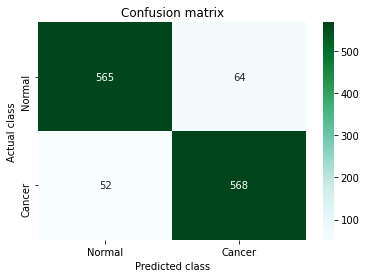

In [50]:
# CM = confusion_matrix(y_true, pred)
# from mlxtend.plotting import plot_confusion_matrix
# fig, ax = plot_confusion_matrix(conf_mat=CM ,  figsize=(5, 5))
# plt.show()
sns.heatmap(cnf, xticklabels=LABELS, yticklabels=LABELS, annot=True, fmt="d",cmap=plt.cm.BuGn);
plt.title("Confusion matrix")
plt.ylabel('Actual class')
plt.xlabel('Predicted class')
plt.show()

Cancer


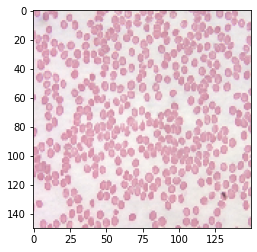

In [62]:
from keras.preprocessing import image
img = image.load_img('/content/drive/My Drive/cancer_detection/dataset/val/Cancer/33.jpg', target_size=(150, 150))
imgplot = plt.imshow(img)
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
images = np.vstack([x])
classes = model.predict_classes(images, batch_size=10)
if classes == [1]:
   print("Normal")
elif classes == [0]:
  print("Cancer")
else:
   print("Sorry")

Normal


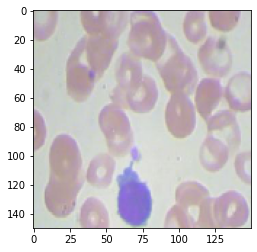

In [69]:
from keras.preprocessing import image
img = image.load_img('/content/drive/My Drive/cancer_detection/dataset/val/Normal/_3_7545.jpeg', target_size=(150, 150))
imgplot = plt.imshow(img)
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
images = np.vstack([x])
classes = model.predict_classes(images, batch_size=10)
if classes == [1]:
   print("Normal")
elif classes == [0]:
  print("Cancer")
else:
   print("Sorry")

## Final execution time  

In [70]:
end = time.time()
print("total runtime: ",(end - start))

total runtime:  19908.934794187546
